# ML Model: Third Iteration.



In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Observations from the second iteration.

* Use a Random Forest Classifier since a Decision Tree is more likely biased.

* Keep classes balanced (abandono)

* Improve the model. Don't perfome feature selection again.

In [192]:
#from google.colab import drive
#drive.mount('/content/drive')

In [193]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_df.xlsx', na_values='#N/D')
df.head()

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat
0,1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,...,Baja,0,8,0,6,0,5,71916,14670.864,>=30
1,2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,>=30
2,4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,...,Media,0,7,3,0,0,0,25080,4037.880,>=30
3,5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,...,Alta,0,8,3,8,3,0,34908,6876.876,>=30
4,7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,<30


In [194]:
# First make a copy of the dataset
ml_df = df.copy()
#ml_df.drop(columns=['id', 'impact'])
ml_df.head()

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat
0,1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,...,Baja,0,8,0,6,0,5,71916,14670.864,>=30
1,2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,>=30
2,4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,...,Media,0,7,3,0,0,0,25080,4037.880,>=30
3,5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,...,Alta,0,8,3,8,3,0,34908,6876.876,>=30
4,7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,<30


In [195]:
# Import train_test_split and OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Categorical
cat = ml_df.select_dtypes('O')
ohe = OneHotEncoder(sparse_output = False)
ohe.fit(cat)
cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

# Numerical
num = ml_df.select_dtypes('number').reset_index(drop = True)

# Combine Categorical and Numerical
ml_df = pd.concat([cat_ohe,num], axis = 1)
ml_df.head(5)

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352


## Building the model.


In [196]:
# Define X and y
X = ml_df.drop(columns=['abandono', 'id', 'impact'])
y = ml_df['abandono']
y.value_counts(normalize=True)

0    0.838776
1    0.161224
Name: abandono, dtype: float64

We observe a class imbalance in 'abandono' of around 8 times the minority class. That means we have very few samples of employees who churned, compared to the ones who stayed at the company.

In [197]:
# Install the neccesary packages for imbalaced class.
#pip install imbalanced-learn

Text(0.5, 1.0, 'Re-sample. Churn: 0, No Churn: 1')

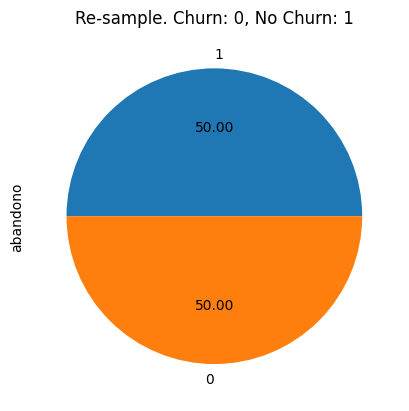

In [198]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Re-sample the data
ros = RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(X, y)

# Plot the re-sample
ax = y_res.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Re-sample. Churn: 0, No Churn: 1')

In [199]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=123)

# Fit the model
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

# Make predictions using X_test
predictions_scaled = rfc.predict_proba(X_test)[:, 1]

# How good is the model?
roc_auc_score(y_test, predictions_scaled)

0.8359695243123538

In [200]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Primero RandomizedSearchCV despues GridSearchCV

# Hyperparameter Tuning
params = {'max_depth': np.arange(2, 10),
          'min_samples_split':np.arange(2, 10),
          'min_samples_leaf': np.arange(2, 6)}

# Instantiate a KFold cross validator
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# Instantiate a DecisionTreeClassifier model
rf = RandomForestClassifier()

# Perform the Cross Validation
cross_validation = RandomizedSearchCV(rf, params, cv=kf)
cross_validation.fit(X_train, y_train)

# Check which parameters are the best
print("Tuned DecisionTreeClassifier Parameters: {}".format(cross_validation.best_params_))
print("Tuned DecisionTreeClassifier Best Accuracy Score: {}".format(cross_validation.best_score_))

Tuned DecisionTreeClassifier Parameters: {'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 8}
Tuned DecisionTreeClassifier Best Accuracy Score: 0.870795007120717


In [201]:
# Instantiate a tuned DecisionTreeClassifier
rfc_tuned = DecisionTreeClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=2)
rfc_tuned.fit(X_train, y_train)

# Make predictions
predictions_tuned = rfc_tuned.predict_proba(X_test)[:, 1]

# Set y_pred
y_pred = rfc_tuned.predict(X_test)

# Get the roc_auc_score of the tuned model.
roc_auc_score(y_test, predictions_tuned)

0.9080559649778912

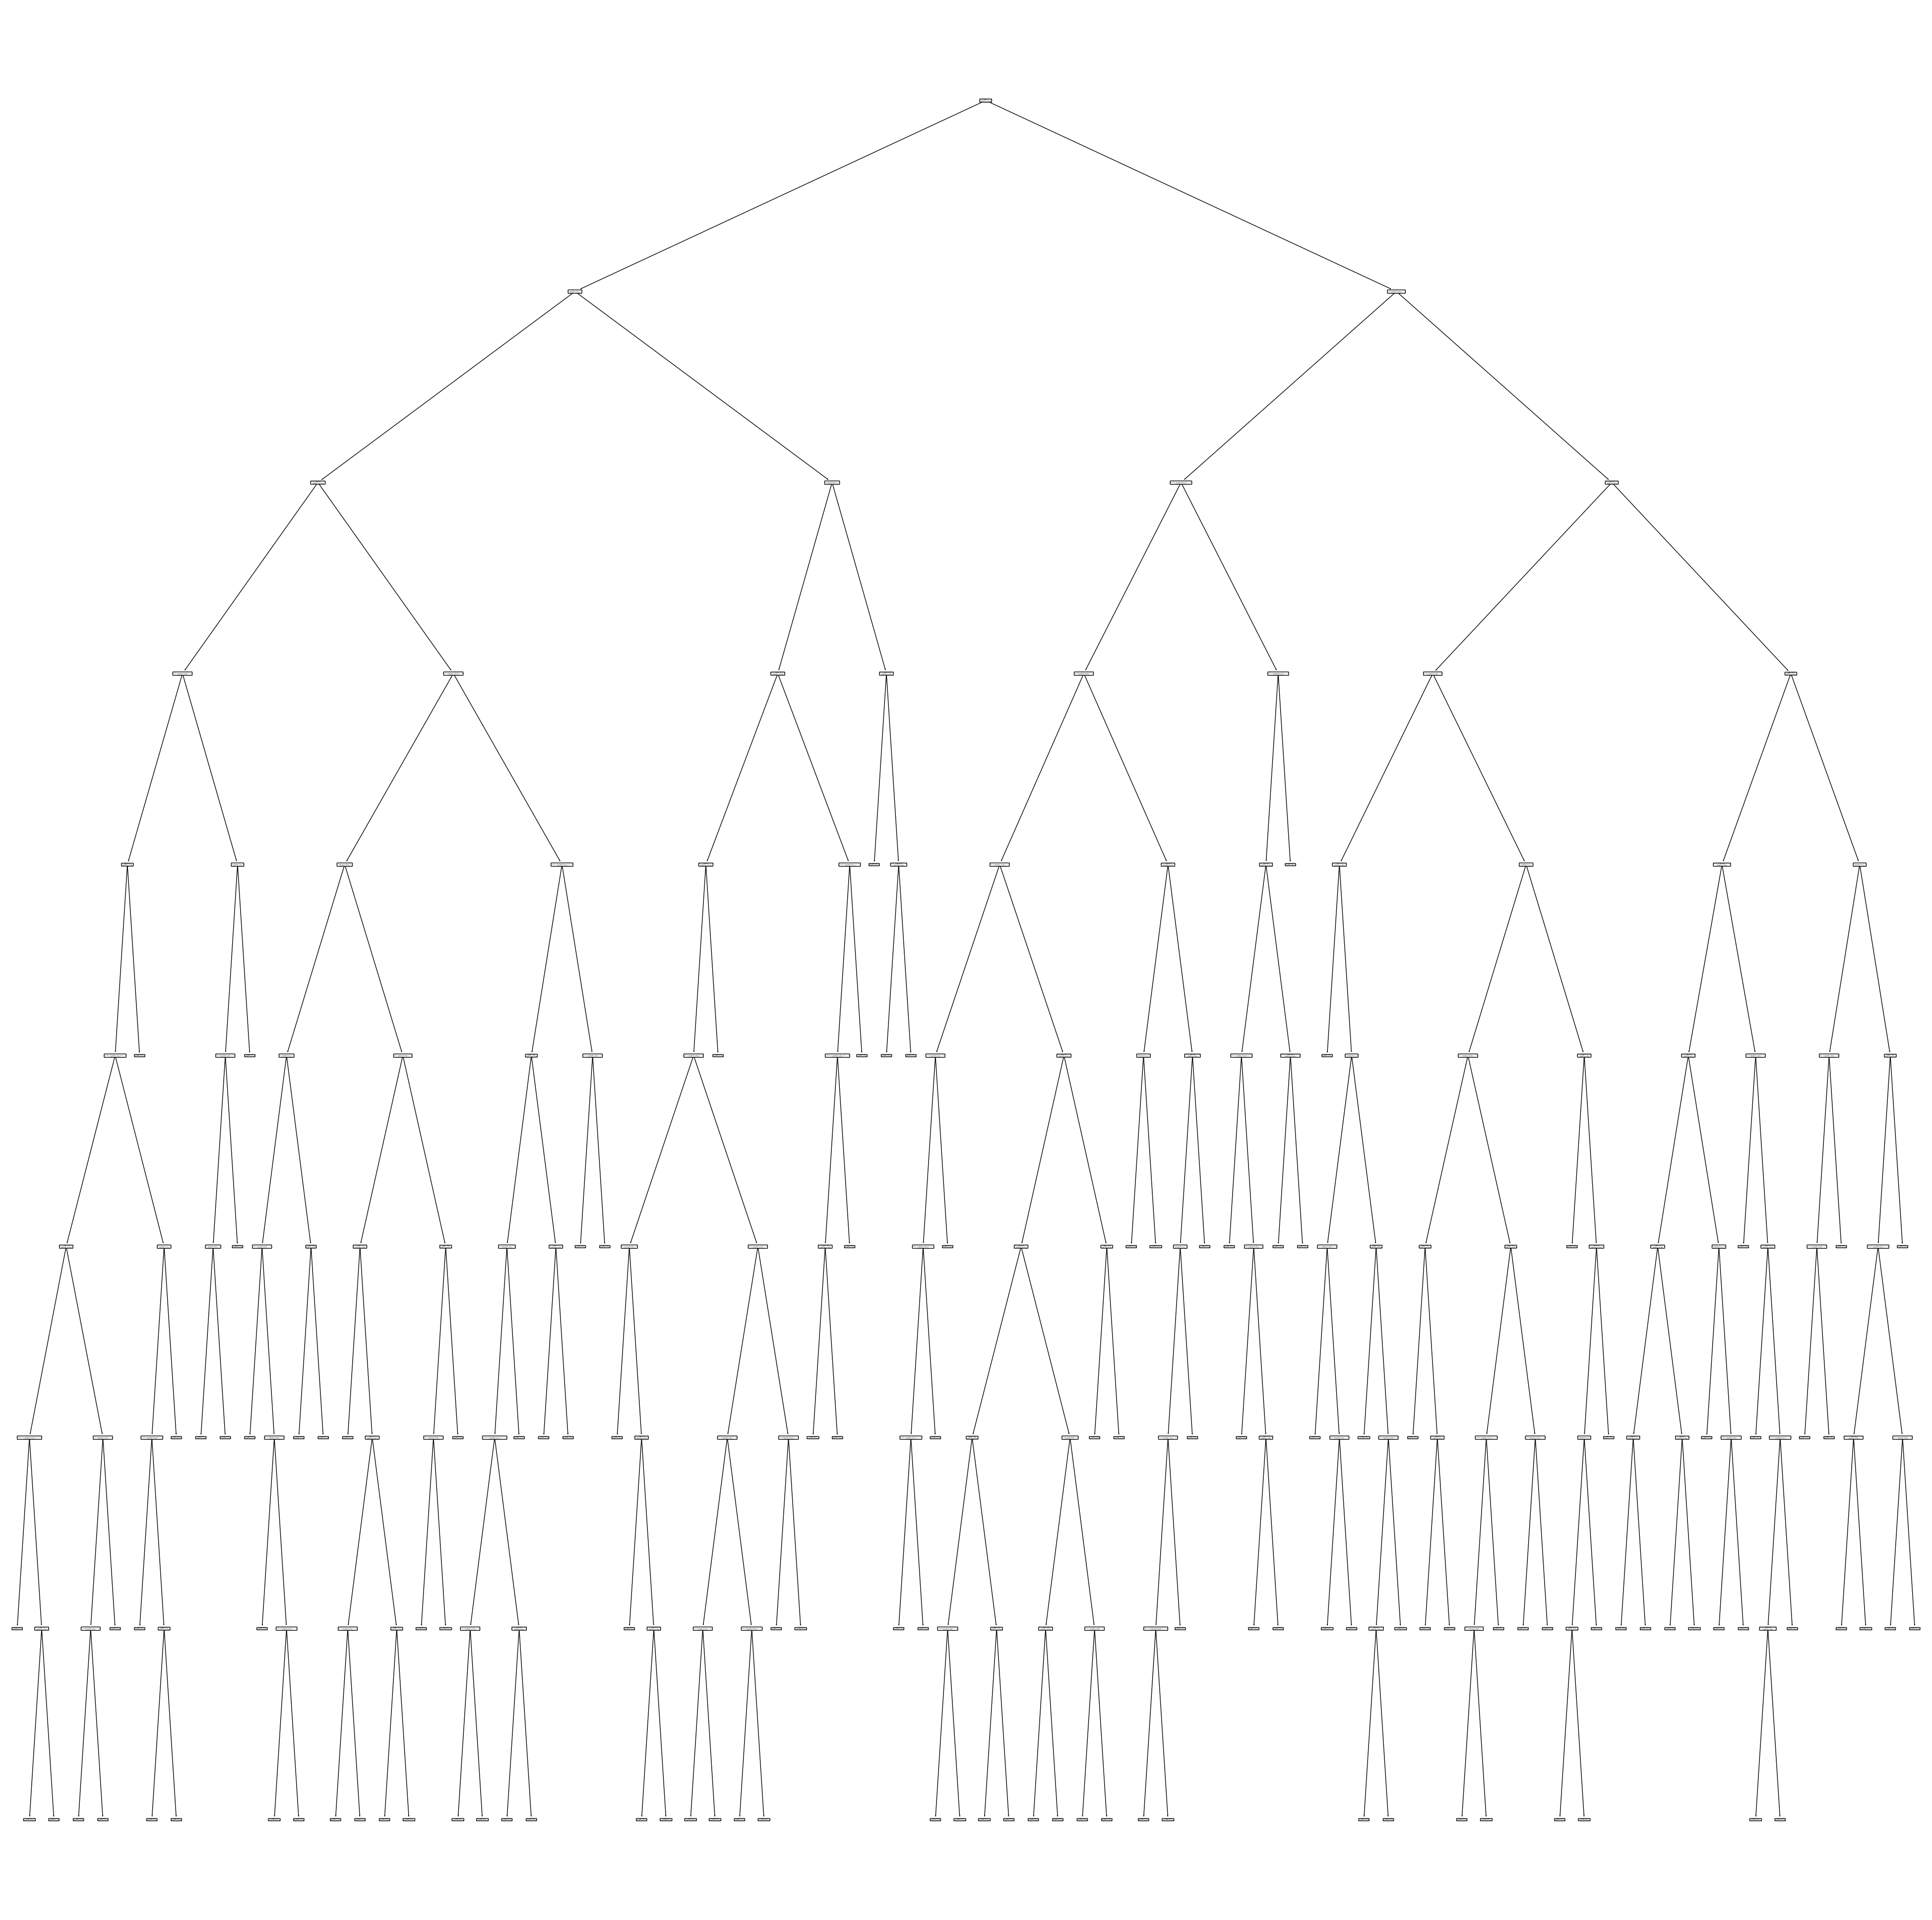

In [202]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(rfc_tuned,
          feature_names= X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

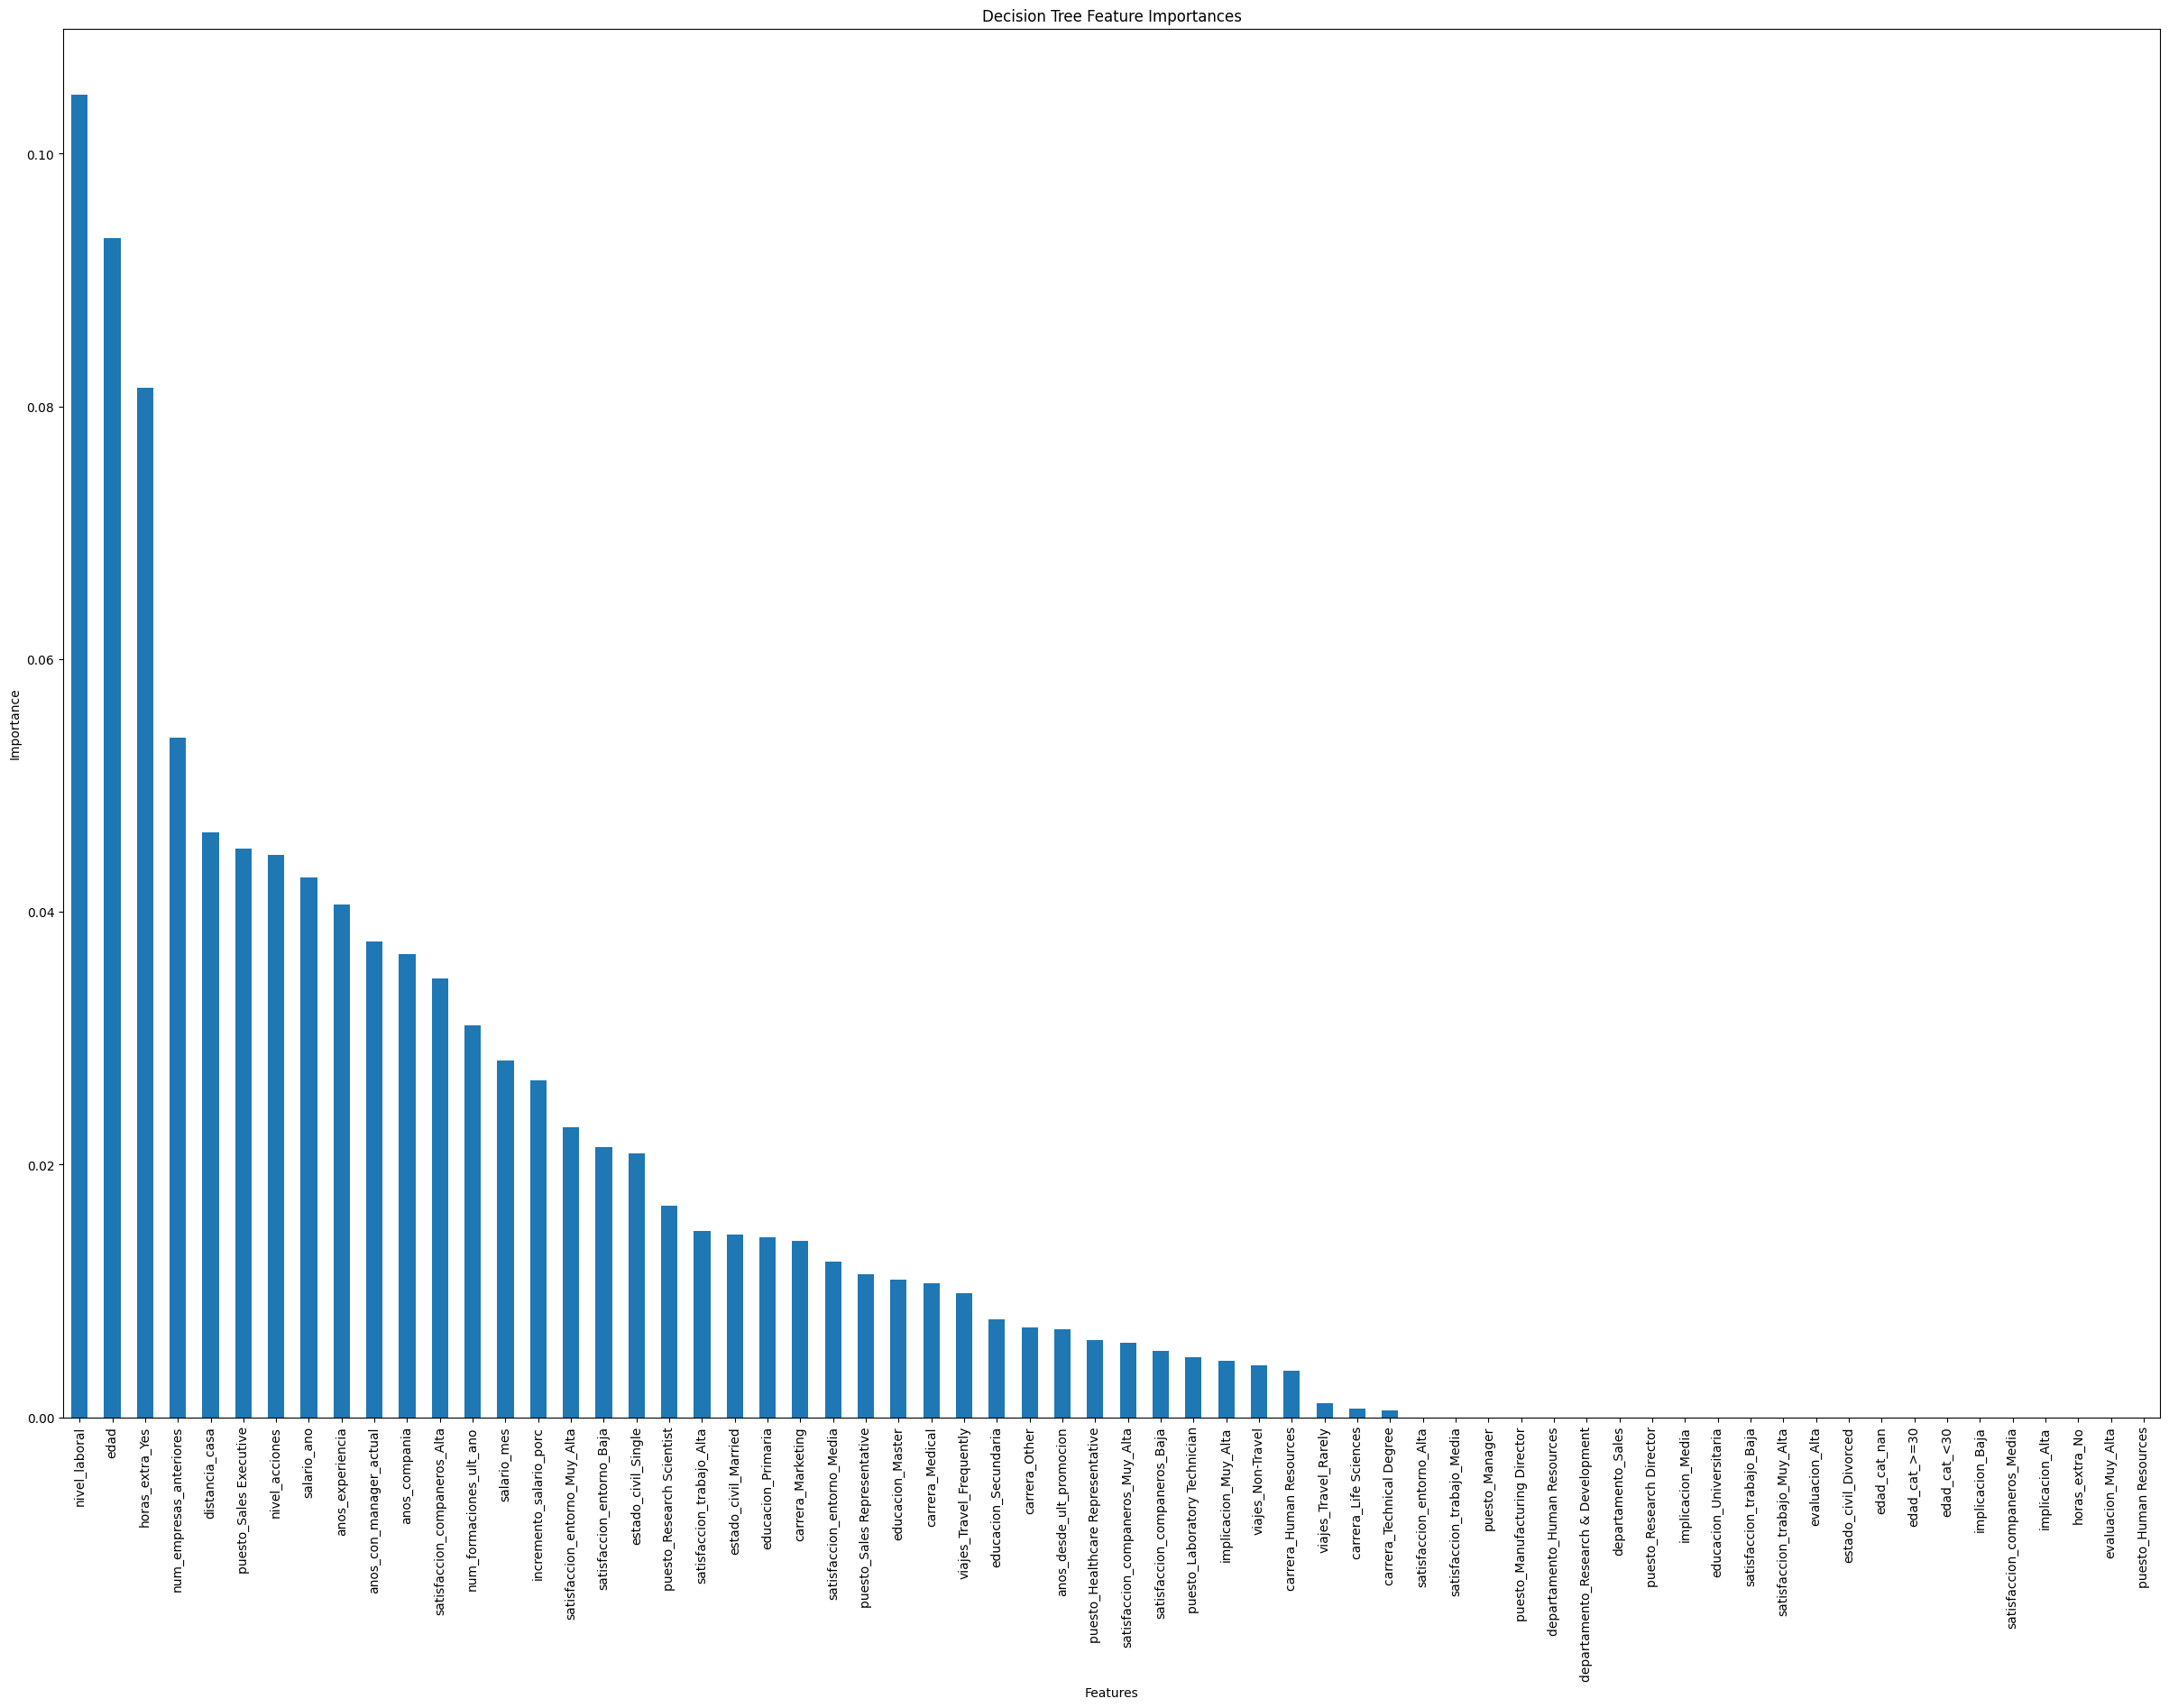

In [203]:
a = pd.Series(rfc_tuned.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

Now let's take a look at the confusion matrix.

In [204]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print it
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[263,  84],
       [ 13, 380]])

Let's make the visualization clearer

In [205]:
from sklearn.utils.multiclass import unique_labels
def df_confusion_matrix(y_test, y_pred):
  '''

  '''
  try:
    labels = unique_labels(y_test)
    columns = [f'Prediceted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                          columns=columns, index=index)
  except Exception:
    ValueError()
  return table

In [206]:
df_confusion_matrix(y_test, y_pred)

,Prediceted 0,Prediceted 1
Actual 0,263,84
Actual 1,13,380


Now let's add predictions to our dataset.

In [207]:
df['scoring_abandono'] = rfc_tuned.predict_proba(ml_df.drop(columns = ['abandono', 'id', 'impact']))[:, 1]
df = df.sort_values(by='scoring_abandono', ascending=False)
df

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impact,edad_cat,scoring_abandono
850,1190,32,0,Non-Travel,Sales,2,Universitaria,Life Sciences,Alta,Alta,...,3,1,3,1,0,0,33924,6683.028,>=30,1.0
525,720,24,1,Travel_Rarely,Sales,3,Universitaria,Life Sciences,Baja,Alta,...,0,4,3,2,2,0,54924,11204.496,<30,1.0
256,351,42,0,Travel_Rarely,Research & Development,2,Secundaria,Medical,Muy_Alta,Media,...,1,10,4,9,7,8,31116,6129.852,>=30,1.0
502,682,53,0,Travel_Rarely,Sales,1,Universitaria,Medical,Muy_Alta,Alta,...,0,18,2,14,8,10,100572,21522.408,>=30,1.0
136,179,51,1,Travel_Frequently,Research & Development,8,Primaria,Life Sciences,Baja,Baja,...,0,18,2,4,0,3,127800,27349.200,>=30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,269,35,0,Travel_Frequently,Research & Development,2,Universitaria,Medical,Media,Alta,...,0,10,5,6,1,2,53100,10832.400,>=30,0.0
726,1011,31,0,Travel_Frequently,Research & Development,1,Universitaria,Life Sciences,Alta,Alta,...,1,4,1,4,0,3,49776,9805.872,>=30,0.0
727,1012,18,0,Non-Travel,Research & Development,5,Universitaria,Life Sciences,Media,Alta,...,0,0,2,0,0,0,12612,2030.532,NaN,0.0
728,1013,54,0,Travel_Rarely,Research & Development,17,Universitaria,Technical Degree,Alta,Alta,...,1,22,2,10,0,8,128868,27577.752,>=30,0.0


In [208]:
# Set the Dataframe into Excel
from google.colab import files

#df.to_excel('abandono_w_scores_3_iteration.xlsx')
#files.download('abandono_w_scores_3_iteration.xlsx')